# Data distributions study

In this jupyter we explore the result of goodness of fit test on many possible distributions of the mass by charge ratio and the intensities. We have run the script called "data_distribution_tests.py", which you can rerun by running the following:

```bash
python data_distribution_tests.py
```

The script will produce a CSV file called "data_distribution_tests.csv" which contains the results of the tests.

In [8]:
import pandas as pd

results = pd.read_csv("data_distribution_tests.csv")
results

,name,data_name,pvalue,statistic,loc,scale,required_time,a,c,d
0,uniform,Masses,1.000000,inf,0.0,1.0,88.299126,NaN,NaN,NaN
1,uniform,Intensities,1.000000,inf,0.0,1.0,90.208206,NaN,NaN,NaN
2,norm,Masses,0.000999,9.229263e+03,0.0,1.0,88.691087,NaN,NaN,NaN
3,norm,Intensities,0.000999,5.857266e+04,0.0,1.0,83.011115,NaN,NaN,NaN
4,loggamma,Masses,1.000000,inf,NaN,NaN,0.000538,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
165,weibull_max,Intensities,1.000000,inf,NaN,NaN,0.000625,NaN,NaN,NaN
166,weibull_min,Masses,1.000000,inf,NaN,NaN,0.000872,NaN,NaN,NaN
167,weibull_min,Intensities,1.000000,inf,NaN,NaN,0.000882,NaN,NaN,NaN
168,wrapcauchy,Masses,0.000999,inf,0.0,1.0,1081.893116,NaN,0.143399,NaN


## Best distribution fitting the masses ratios



In [9]:
results[results.data_name == "Masses"].sort_values(["pvalue", "statistic"]).head(10)

,name,data_name,pvalue,statistic,loc,scale,required_time,a,c,d
162,wald,Masses,0.000999,202.133690,0.0,1.0,396.765733,NaN,NaN,NaN
70,gibrat,Masses,0.000999,346.663316,0.0,1.0,540.669107,NaN,NaN,NaN
78,halflogistic,Masses,0.000999,1162.873718,0.0,1.0,651.770527,NaN,NaN,NaN
74,halfcauchy,Masses,0.000999,2941.331657,0.0,1.0,556.040564,NaN,NaN,NaN
102,logistic,Masses,0.000999,5609.728631,0.0,1.0,159.033939,NaN,NaN,NaN
94,laplace,Masses,0.000999,6020.156407,0.0,1.0,102.066453,NaN,NaN,NaN
76,halfnorm,Masses,0.000999,6280.928386,0.0,1.0,416.445828,NaN,NaN,NaN
24,cauchy,Masses,0.000999,7905.574565,0.0,1.0,319.982025,NaN,NaN,NaN
134,rayleigh,Masses,0.000999,8686.152255,0.0,1.0,86.431092,NaN,NaN,NaN
2,norm,Masses,0.000999,9229.262797,0.0,1.0,88.691087,NaN,NaN,NaN


In [13]:
from glob import glob
import numpy as np

masses = []
intensities = []

for path in glob("tests/data/*.mgf"):
    with open(path, "r", encoding="utf8") as f:
        for line in f:
            if line.count(".") == 2 and line.count(" ") == 1:
                mass, intensity = line.split(" ")
                masses.append(float(mass))
                intensities.append(float(intensity))
                
masses = np.array(masses)
intensities = np.array(intensities)

In [36]:
import scipy

goodness = scipy.stats.goodness_of_fit(
    scipy.stats.wald,
    masses,
    n_mc_samples=1000
)

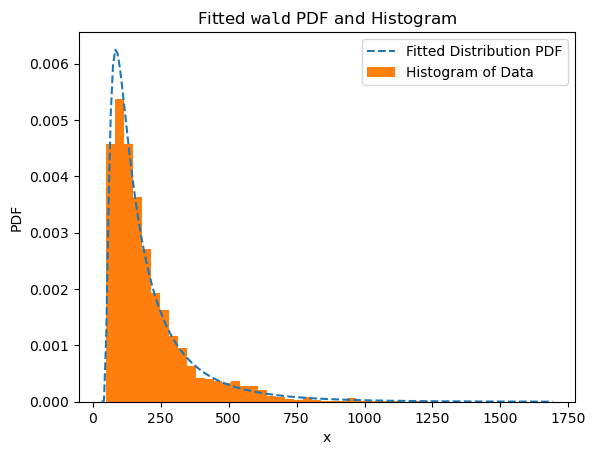

In [38]:
goodness.fit_result.plot()

In [39]:
goodness.fit_result.params

FitParams(loc=32.63571379028932, scale=171.56365806874632)

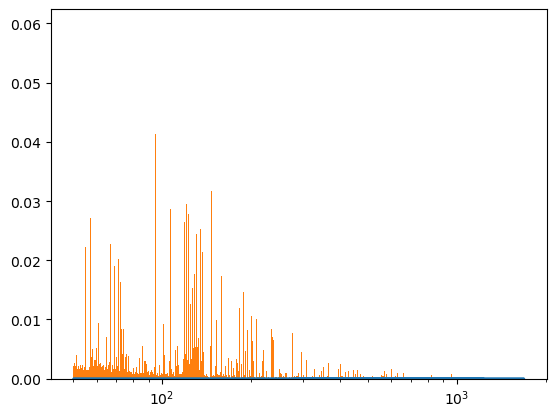

In [34]:
import scipy
import matplotlib.pyplot as plt

x = np.linspace(0,20,10000)
pdf = scipy.stats.wald.pdf
plt.plot(masses,pdf(masses, 0, 1.0))
plt.hist(masses, bins=5000, density=True)
plt.xscale("log")
plt.show()

In [10]:
results[results.data_name == "Intensities"].sort_values(["pvalue", "statistic"]).head(10)

,name,data_name,pvalue,statistic,loc,scale,required_time,a,c,d
101,levy,Intensities,0.000999,1.373241e+03,0.0,1.0,400.105565,NaN,NaN,NaN
75,halfcauchy,Intensities,0.000999,1.985510e+03,0.0,1.0,516.054459,NaN,NaN,NaN
27,skewcauchy,Intensities,0.000999,2.374711e+03,0.0,1.0,451.577467,1.0,NaN,NaN
25,cauchy,Intensities,0.000999,2.692650e+04,0.0,1.0,253.791108,NaN,NaN,NaN
103,logistic,Intensities,0.000999,4.481424e+04,0.0,1.0,145.820724,NaN,NaN,NaN
3,norm,Intensities,0.000999,5.857266e+04,0.0,1.0,83.011115,NaN,NaN,NaN
163,wald,Intensities,0.000999,6.395922e+04,0.0,1.0,392.244936,NaN,NaN,NaN
135,rayleigh,Intensities,0.000999,6.615614e+04,0.0,1.0,92.794912,NaN,NaN,NaN
11,anglit,Intensities,0.000999,inf,0.0,1.0,340.562666,NaN,NaN,NaN
13,arcsine,Intensities,0.000999,inf,0.0,1.0,1003.040929,NaN,NaN,NaN


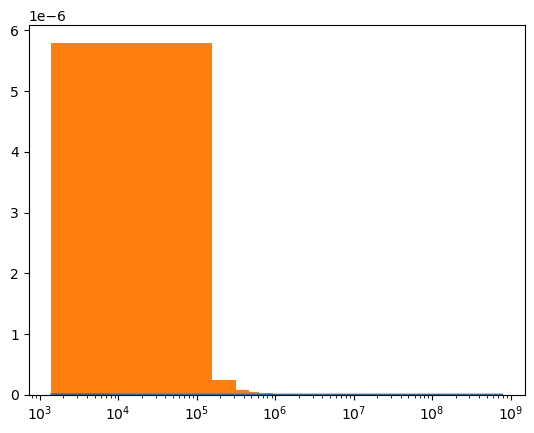

In [35]:
import scipy
import matplotlib.pyplot as plt

x = np.linspace(0,20,10000)
pdf = scipy.stats.wald.pdf
plt.plot(intensities,pdf(intensities, 0, 1.0))
plt.hist(intensities, bins=5000, density=True)
plt.xscale("log")
plt.show()